# Trabajo Práctico Aprendizaje No Supervisado 2020 DiploDatos.

##Grupo 17, Comision 2





## 1.0 Análisis Exploratorio

Importamos las librerias y módulos necesarios:

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import os
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

Importamos el database:

In [ ]:
#vinculamos el Drive
from google.colab import drive
drive.mount('/content/drive')

#nos posicionamos en la carpeta TP Aprendizaje NoSupervisado:
os.chdir('/content/drive/My Drive/TP Aprendizaje NoSupervisado')

#Leemos el dataset:
df = pd.read_csv('players_20.csv')
df

Mounted at /content/drive


sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

In [ ]:
df.shape


(18278, 104)

In [ ]:
df.describe(include='all')

sofifa_id                                         player_url  \
count    18278.000000                                              18278   
unique            NaN                                              18278   
top               NaN  https://sofifa.com/player/246075/isaak-umbdens...   
freq              NaN                                                  1   
mean    219738.864482                                                NaN   
std      27960.200461                                                NaN   
min        768.000000                                                NaN   
25%     204445.500000                                                NaN   
50%     226165.000000                                                NaN   
75%     240795.750000                                                NaN   
max     252905.000000                                                NaN   

          short_name   long_name           age         dob     height_cm  \
count          18278       18278  18278.000000       18278  18278.000000   
unique         17354       18218           NaN        6142           NaN   
top     J. Rodríguez  Liam Kelly           NaN  1992-02-29           NaN   
freq              11           3           NaN         113           NaN   
mean             NaN         NaN     25.283291         NaN    181.362184   
std              NaN         NaN      4.656964         NaN      6.756961   
min              NaN         NaN     16.000000         NaN    156.000000   
25%              NaN         NaN     22.000000         NaN    177.000000   
50%              NaN         NaN     25.000000         NaN    181.000000   
75%              NaN         NaN     29.000000         NaN    186.000000   
max              NaN         NaN     42.000000         NaN    205.000000   

           weight_kg nationality          club       overall     potential  \
count   18278.000000       18278         18278  18278.000000  18278.000000   
unique           NaN         162           698           NaN           NaN   
top              NaN     England  FC Barcelona           NaN           NaN   
freq             NaN        1667            33           NaN           NaN   
mean       75.276343         NaN           NaN     66.244994     71.546887   
std         7.047744         NaN           NaN      6.949953      6.139669   
min        50.000000         NaN           NaN     48.000000     49.000000   
25%        70.000000         NaN           NaN     62.000000     67.000000   
50%        75.000000         NaN           NaN     66.000000     71.000000   
75%        80.000000         NaN           NaN     71.000000     75.000000   
max       110.000000         NaN           NaN     94.000000     95.000000   

           value_eur       wage_eur player_positions preferred_foot  \
count   1.827800e+04   18278.000000            18278          18278   
unique           NaN            NaN              643              2   
top              NaN            NaN               CB          Right   
freq             NaN            NaN             2322          13960   
mean    2.484038e+06    9456.942773              NaN            NaN   
std     5.585481e+06   21351.714095              NaN            NaN   
min     0.000000e+00       0.000000              NaN            NaN   
25%     3.250000e+05    1000.000000              NaN            NaN   
50%     7.000000e+05    3000.000000              NaN            NaN   
75%     2.100000e+06    8000.000000              NaN            NaN   
max     1.055000e+08  565000.000000              NaN            NaN   

        international_reputation     weak_foot   skill_moves      work_rate  \
count               18278.000000  18278.000000  18278.000000          18278   
unique                       NaN           NaN           NaN              9   
top                          NaN           NaN           NaN  Medium/Medium   
freq                         NaN           NaN           NaN           9875   
m

In [ ]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [ ]:
df.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

In [ ]:
for i in df.columns:
  print(i)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

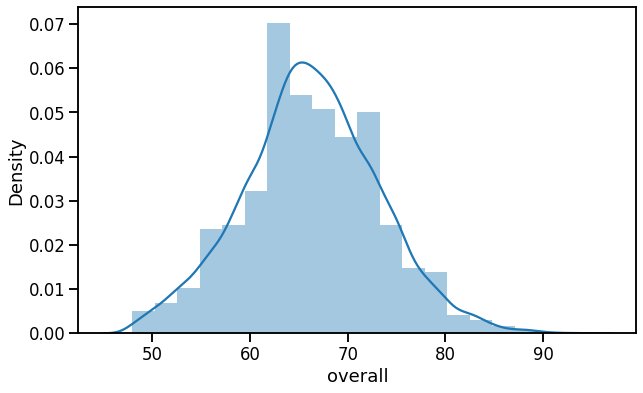

In [ ]:
sns.set_context(context='talk', font_scale=1)
plt.figure(figsize=(10,6))
sns.distplot(df['overall'], bins = 20)


In [ ]:
df['player_positions'].value_counts()

CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
CM, CDM          682
LB               669
RB               587
CDM              363
CAM              291
CB, RB           255
LM               247
RM               227
CAM, CM          222
RM, LM           221
CB, LB           218
LM, RM           209
CB, CDM          192
LB, LM           190
CM, CAM          178
RB, LB           130
RB, RM           120
RB, CB           119
LB, LWB          108
ST, LW           107
ST, RM           105
CDM, CB          102
ST, CAM           99
LB, CB            98
ST, LM            96
RB, RWB           93
RW                91
LW, RW            89
ST, RW            89
LW                88
RM, ST            79
CM, CDM, CAM      77
RW, LW            72
CAM, LM           70
LM, CAM           68
CM, CAM, CDM      66
RM, RW            65
CAM, RM           63
LB, RB            60
ST, CF            58
LM, LW            57
CM, RM            57
LM, ST       

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']].sort_index()
best_players_per_position

player_positions              short_name  overall
0           RW, CF, ST                L. Messi       94
1               ST, LW       Cristiano Ronaldo       93
2              LW, CAM               Neymar Jr       92
3                   GK                J. Oblak       91
4               LW, CF               E. Hazard       91
5              CAM, CM            K. De Bruyne       91
7                   CB             V. van Dijk       90
8                   CM               L. Modrić       90
9               RW, ST                M. Salah       90
10              ST, RW               K. Mbappé       89
12                  ST                 H. Kane       89
15             CDM, CM                N. Kanté       89
22          CF, ST, LW            A. Griezmann       89
23             CAM, RW               P. Dybala       88
24             CM, CDM                P. Pogba       88
26              RW, LW             R. Sterling       88
37         CAM, LM, ST                 M. Reus       88
38              ST, LM           P. Aubameyang       88
39              LW, LM                 S. Mané       88
40              CB, LB              A. Laporte       87
41         RW, CAM, CM          Bernardo Silva       87
42                 CDM                Casemiro       87
43              CF, LM                  H. Son       87
46              CF, ST              K. Benzema       87
51                  LB              Jordi Alba       87
52        CM, CAM, CDM                  Thiago       87
54          CF, LW, ST              L. Insigne       87
55                  LW                 L. Sané       86
56             CB, CDM              Marquinhos       86
61         RB, CM, CDM              J. Kimmich       86
62         CAM, CM, LW                    Isco       86
63         CF, ST, CAM         Roberto Firmino       86
68              LW, CM                Coutinho       86
70         CAM, RM, RW               T. Müller       86
78             CM, CAM     S. Milinković-Savić       85
80          CM, LM, RM                    Saúl       85
92              LB, CB                D. Alaba       85
94                  RB                Carvajal       85
97         CAM, CF, ST                A. Gómez       85
100         RW, LW, ST                 G. Bale       85
103             LB, LM             Alex Sandro       85
105         RM, LM, CM                    Koke       85
106        CAM, CM, RM            J. Rodríguez       85
108             RM, LM               J. Sancho       84
109            CAM, RM              K. Havertz       84
116        CF, LW, CAM                M. Depay       84
118        CAM, LM, RM               J. Brandt       84
119         LM, RM, LW                K. Coman       84
120         RM, LM, LW               S. Gnabry       84
121                CAM                N. Fekir       84
123        CAM, CM, CF            Luis Alberto       84
127                 LM         Felipe Anderson       84
136            CDM, CB           Javi Martínez       84
144             RB, CB             Azpilicueta       84
145             RM, RW           José Callejón       84
150         LM, RW, LW           Douglas Costa       84
151             RM, CM                   Pizzi       84
152        CAM, LW, ST                D. Tadić       84
154             RW, RM               R. Mahrez       84
157       CM, CDM, CAM                  Fabián       83
159        CM, CAM, CF             G. Lo Celso       83
163         LW, ST, LM              A. Martial       83
168             LM, ST          Gonçalo Guedes       83
169         RM, RW, ST                 N. Pépé       83
176        LM, CAM, RM                T. Lemar       83
178             LW, RW           Marco Asensio       83
185         CF, LM, LW                 W. Zaha       83
190            RM, CAM         F. Bernardeschi       83
197         CF, RM, LM             Lucas Moura       83
209        RW, LW, CAM                 C. Vela       83
213       CDM, CM, CAM        

In [ ]:
pd.DataFrame(df.player_positions.value_counts().sort_index())

player_positions
CAM                        291
CAM, CDM                    10
CAM, CDM, CB                 1
CAM, CDM, CM                12
CAM, CF                     43
CAM, CF, CM                  5
CAM, CF, LM                  4
CAM, CF, LW                  1
CAM, CF, RM                  1
CAM, CF, RW                  2
CAM, CF, ST                  6
CAM, CM                    222
CAM, CM, CDM                22
CAM, CM, CF                 12
CAM, CM, LM                 39
CAM, CM, LW                 10
CAM, CM, RM                 20
CAM, CM, RW                 11
CAM, CM, ST                  8
CAM, LB                      1
CAM, LM                     70
CAM, LM, CF                  2
CAM, LM, CM                 18
CAM, LM, LW                  2
CAM, LM, RM                 34
CAM, LM, RW                  2
CAM, LM, ST                  7
CAM, LW                     25
CAM, LW, CF                  1
CAM, LW, CM                  3
CAM, LW, RW                  6
CAM, LW, ST                  6
CAM, RB                      2
CAM, RM                     63
CAM, RM, CDM                 1
CAM, RM, CF                  5
CAM, RM, CM                 11
CAM, RM, LM                 22
CAM, RM, RB                  1
CAM, RM, RW                  3
CAM, RM, ST                 10
CAM, RW                     29
CAM, RW, CF                  2
CAM, RW, CM                  5
CAM, RW, LW                  8
CAM, RW, RM                  5
CAM, ST                     54
CAM, ST, CDM                 1
CAM, ST, CF                  2
CAM, ST, CM                  4
CAM, ST, LM                  8
CAM, ST, LW                  4
CAM, ST, RB                  1
CAM, ST, RM                  4
CAM, ST, RW                  4
CB                        2322
CB, CAM                      1
CB, CDM                    192
CB, CDM, CAM                 1
CB, CDM, CM                 20
CB, CDM, LB                  5
CB, CDM, RB                 15
CB, CF                       1
CB, CM                      19
CB, CM, CDM                  3
CB, CM, LB                   1
CB, CM, RB                   2
CB, LB                     218
CB, LB, CDM                  4
CB, LB, CM                   2
CB, LB, LM                   2
CB, LB, LWB                  6
CB, LB, RB                  16
CB, LM, LB                   1
CB, LM, ST                   1
CB, LWB                     10
CB, LWB, LB                  1
CB, RB                     255
CB, RB, CAM                  1
CB, RB, CDM                 14
CB, RB, LB                  33
CB, RB, RM                   5
CB, RM                       2
CB, RWB                      5
CB, RWB, RB                  1
CB, ST                       3
CDM                        363
CDM, CAM                    10
CDM, CAM, CM                 5
CDM, CAM, LM                 1
CDM, CAM, RB                 2
CDM, CAM, RM                 1
CDM, CB                    102
CDM, CB, CM                 29
CDM, CB, LB                  1
CDM, CB, RB                  8
CDM, CM                    731
CDM, CM, CAM                26
CDM, CM, CB                 54
CDM, CM, LB                  3
CDM, CM, LM                  6
CDM, CM, RB                 11
CDM, CM, RM                  6
CDM, LB                     10
CDM, LB, CM                  2
CDM, LB, LM                  1
CDM, LB, RB                  1
CDM, LB, RM                  1
CDM, LM                      2
CDM, LM, CM                  1
CDM, LWB                     1
CDM, LWB, CM                 1
CDM, RB                     24
CDM, RB, CB                  2
CDM, RB, CM                  9
CDM, RB, LB                  2
CDM, RB, RM                  1
CDM, RM                      3
CDM, RM, CM                  1
CDM, RM, LM                  1
CDM, RWB                     2
CF                          14
CF, CAM                      9
CF, CAM, CM                  4
CF, CAM, LM                  3
CF, CAM, LW                  1
CF, CAM, RW                  1
CF, CAM, ST                  5
CF, CM         

In [ ]:
club_avg_overall=df.groupby("club")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club    overall
226  FC Bayern München  81.304348
505        Real Madrid  80.121212
350           Juventus  80.060606
650            Uruguay  78.608696
224       FC Barcelona  78.363636
407             Mexico  78.000000
426        Netherlands  78.000000
166           Colombia  78.000000

Quitamos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño del dataset. Consideramos Variables de desempeño por habilidad (skills_ratings)

In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = [
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning',
'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización

In [ ]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [ ]:
df_skills=df_n[skills_ratings]
df_skills

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                     88                   95                          70   
1                     84                   94                          89   
2                     87                   87                          62   
3                     13                   11                          15   
4                     81                   84                          61   
...                  ...                  ...                         ...   
4752                  57                   71                          66   
4753                  70                   53                          61   
4754                  58                   54                          68   
4755                  48                   42                          65   
4756                  99                   99                          99   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
0                          92                 88               97   
1                          83                 87               89   
2                          87                 87               96   
3                          43                 13               12   
4                          89                 83               95   
...                       ...                ...              ...   
4752                       64                 75               74   
4753                       70                 51               69   
4754                       66                 50               67   
4755                       73                 42               61   
4756                       99                 99               99   

      skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0              93                 94                  92                  96   
1              81                 76                  77                  92   
2              88                 87                  81                  95   
3              13                 14                  40                  30   
4              83                 79                  83                  94   
...           ...                ...                 ...                 ...   
4752           67                 68                  58                  75   
4753           70                 53                  77                  68   
4754           49                 53                  64                  69   
4755           48                 39                  66                  66   
4756           99                 99                  99                  99   

      movement_acceleration  movement_sprint_speed  movement_agility  \
0                        91                     84                93   
1                        89                     91                87   
2                        94                     89                96   
3                        43                     60                67   
4                        94                     88                95   
...                     ...                    ...               ...   
4752                     66                     62                67   
4753                     60                     57                67   
4754                     62                     66                64   
4755                     56                     70                62   
4756                     99                     99                99   

      movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                     95                95                86             68   
1                     96                71                95             95   
2                     92                84                80             61   
3                     88                49                59             78   
4                     90       

In [ ]:
df_skills.isnull().sum()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeep

In [ ]:
df_skills.dtypes

attacking_crossing            int64
attacking_finishing           int64
attacking_heading_accuracy    int64
attacking_short_passing       int64
attacking_volleys             int64
skill_dribbling               int64
skill_curve                   int64
skill_fk_accuracy             int64
skill_long_passing            int64
skill_ball_control            int64
movement_acceleration         int64
movement_sprint_speed         int64
movement_agility              int64
movement_reactions            int64
movement_balance              int64
power_shot_power              int64
power_jumping                 int64
power_stamina                 int64
power_strength                int64
power_long_shots              int64
mentality_aggression          int64
mentality_interceptions       int64
mentality_positioning         int64
mentality_vision              int64
mentality_penalties           int64
mentality_composure           int64
defending_marking             int64
defending_standing_tackle   

## 2.0 Evaluación visual e intuitiva de a dos variables por vez.

Veamos aleatoriamente algunos pares de variables:

In [129]:
import random
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
def generar_lista_enteros(minimo, maximo, longitud):
  return [random.randint(minimo, maximo) for _ in range(longitud)]

In [130]:

data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores
configure_plotly_browser_state()
a = generar_lista_enteros(0,33,10)
b = generar_lista_enteros(0,33,10)

for i in range(10):
    skill_1=skills_ratings[a[i]]
    skill_2=skills_ratings[b[i]]

    graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                              mode='markers',
                            text=df_n.loc[:,'club'], 
                              marker=dict(
                                    size=5)
                              )
  

    crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                          text=df_n.loc[bool_crack,'short_name'],
                          textfont=dict(family='sans serif',size=10,color='black'),
                          opacity=0.9,mode='text')

    data=[graf1,crack]

    layout = go.Layout(title=f"Visualización variable {skill_1} vs {skill_2}",titlefont=dict(size=20),
                    xaxis=dict(title=skill_1),
                    yaxis=dict(title=skill_2),
                    autosize=False, width=1000,height=1000)

    fig = go.Figure(data=data, layout=layout)
  

    iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

Vemos que algunos pares de variables como goalkeeping_handling vs mentality_penalties o power_strength vs goalkeeping_diving, permiten diferenciar dos clusters bien separados

## 3.1 Clustering con Kmeans

Utilizamos el metodo del codo (elbow method) para seleccionar la cantidad adecuada de clusters

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters\n')

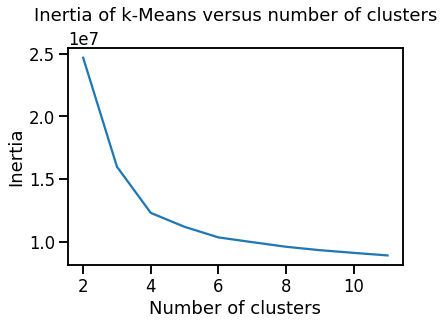

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters\n")

In [ ]:
n_clust = 4
km = KMeans(n_clusters=n_clust)
km.fit(df_skills)
clusters = km.labels_
clusters_count = max(km.labels_)+1

Podemos ver que el angulo mas pronunciado se da para un numero de clusters de 4. Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86
configure_plotly_browser_state()
a = generar_lista_enteros(0,33,10)
b = generar_lista_enteros(0,33,10)

for i in range(10):
  skill_1=skills_ratings[a[i]]
  skill_2=skills_ratings[b[i]]

  kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                          text=df_n.loc[:,'short_name'],
                            marker=dict(
                                  size=5,
                                  color = clusters.astype(np.float), #set color equal to a variable
                                  colorscale='Portland',
                                  showscale=False)
                            )

  crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                        text=df_n.loc[bool_crack,'short_name'],
                        textfont=dict(family='sans serif',size=10,color='black'),
                        opacity=0.9,mode='text')

  data=[kmean_clusters,crack]

  layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                  xaxis=dict(title=skill_1),
                  yaxis=dict(title=skill_2),
                  autosize=False, width=1000, height=1000)

  fig = go.Figure(data=data, layout=layout)

  iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

Podemos ver que varios pares de variables separan sin problemas a los arqueros, sin embargo para el resto de posiciones se producen solapamientos de los clusters encontrados. 

**EVALUACION CON SILHOUETTE**

In [71]:
def silhouette_plt_kmeans(x):
  range_n_clusters = [2,3, 4, 5, 6, 7]
  sse ={}
  index = 0
  fig = plt.figure(figsize=(20, 30))

  for n_clusters in range_n_clusters:
      index += 1
      ax1 = plt.subplot(len(range_n_clusters)/2 + len(range_n_clusters)%2, 2, index)
      ax1.set_xlim([-0.1, 1])
      ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
      clusterer = KMeans(n_clusters=n_clusters, random_state=10)
      cluster_labels = clusterer.fit_predict(x)
      sse[n_clusters] = clusterer.inertia_
      silhouette_avg = silhouette_score(x, cluster_labels)
      print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)
      sample_silhouette_values = silhouette_samples(x, cluster_labels)
      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                            ith_cluster_silhouette_values, facecolor=color,
                            edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples
      # endfor
      
      ax1.set_title(f"\nVisualizacion de los datos {n_clusters} clusters\n ")
      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  return ax1

Para n_clusters = 2 El silhouette_score promedio es : 0.6250488758665841
Para n_clusters = 3 El silhouette_score promedio es : 0.3570495352115961
Para n_clusters = 4 El silhouette_score promedio es : 0.32850728239424903
Para n_clusters = 5 El silhouette_score promedio es : 0.2852728155295224
Para n_clusters = 6 El silhouette_score promedio es : 0.2339101419140372
Para n_clusters = 7 El silhouette_score promedio es : 0.2230216429600418


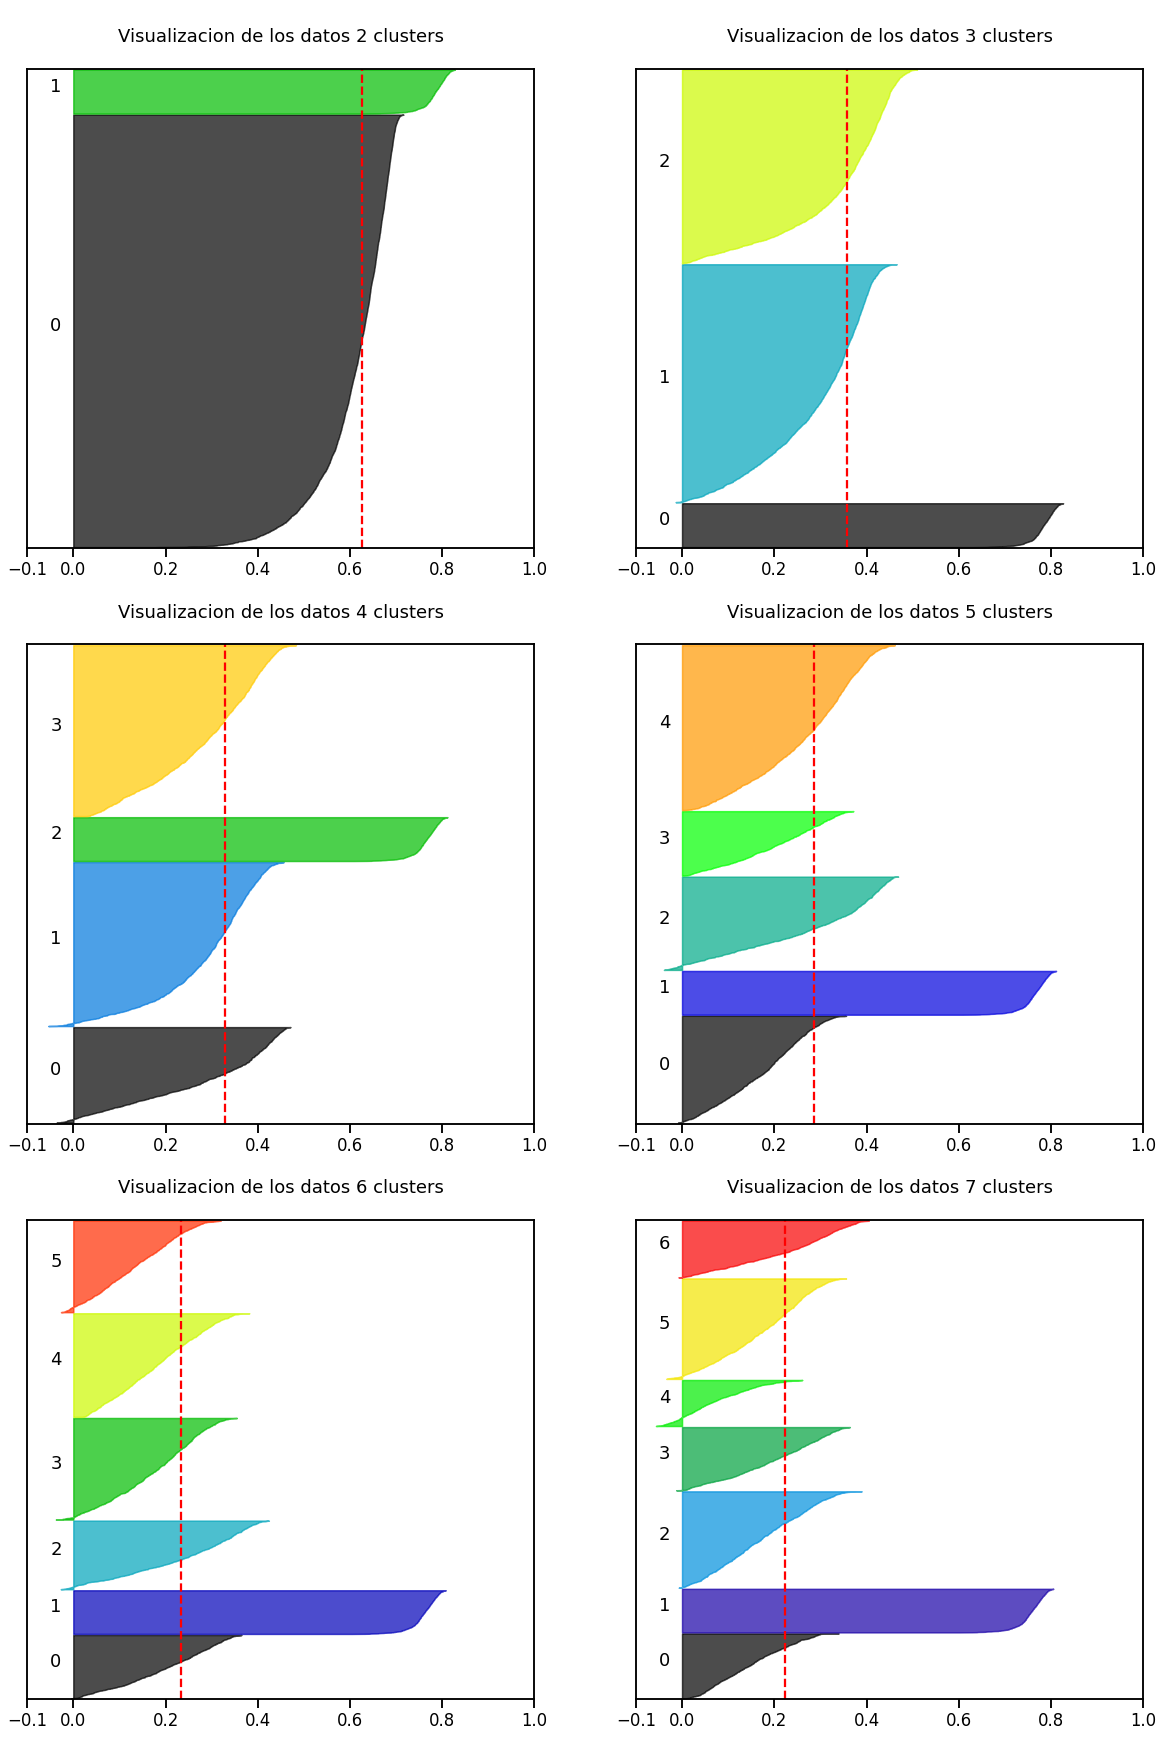

In [ ]:
#Grafico de silueta

ax1 = silhouette_plt_kmeans(df_skills) 

plt.show()

##3.2 Clustering Mean Shift

Probemos mean-shift para los pares power_stamina vs defending_marking,
y mentality_interceptions vs skill_ball_control

In [ ]:
# Estimamos el bandwith para aplicar considerando solo las features numericas
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(df_skills, random_state=42)
bandwidth

97.25644447891264

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth= bandwidth, bin_seeding= False)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 3


In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86
configure_plotly_browser_state()
a = [21,17]
b = [9,26]

for i in range(2):
  skill_1=skills_ratings[a[i]]
  skill_2=skills_ratings[b[i]]
  MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                          text=df_n.loc[:,'short_name'],
                            marker=dict(
                                  size=5,
                                  color = clusters2.astype(np.float), #set color equal to a variable
                                  colorscale='Portland',
                                  showscale=False)
                            )

  crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                        text=df_n.loc[bool_crack,'short_name'],
                        textfont=dict(family='sans serif',size=10,color='black'),
                        opacity=0.9,mode='text')

  data=[MeanShift_clusters,crack]

  layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                  xaxis=dict(title=skill_1),
                  yaxis=dict(title=skill_2),
                  autosize=False, width=1000, height=1000)

  fig = go.Figure(data=data, layout=layout)

  iplot(fig)

In [ ]:
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  3 clusters, según los hiperparámetros elegidos


**EVALUACION CON SILHOUETTE**

In [147]:
def silhouette_plt_MeanShift(x, cluster_labels, n_clusters):
  sample_silhouette_values = silhouette_samples(x, cluster_labels)
  y_lower = 10
  silhouette_avg = silhouette_score(x, cluster_labels) #Valor entre -1 (peor) y 1 (mejor)
  print(f"Para Mean Shift n_clusters = {n_clusters} \n", f"El silhouette_score promedio es : {silhouette_avg}")
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    # endfor
      
  ax1.set_title(f"Visualizacion de los datos {n_clusters} clusters.")
  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      
  return ax1

In [ ]:
#Grafico de silueta
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot(1,1,1)

ax1 = silhouette_plt_MeanShift(df_skills, clusters2, n_clusters_) #Valores negativos son "mal emparejados"

plt.show()

Para Mean Shift n_clusters = 3 
 El silhouette_score promedio es : 0.6166960667794875


##3.3 Clustering con Kmeans SIN ARQUEROS

In [67]:
n=10000

df_n2=df.loc[:n]
df_n2=df_n[(df_n['player_positions']!='GK')&(df_n['overall']>69)]

skills_ratings2 = [
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',]

df_skills2=df_n2[skills_ratings2]

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters\n')

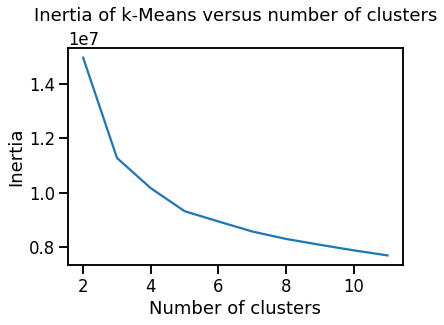

In [77]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

scores = [KMeans(n_clusters=i+2).fit(df_skills2).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters\n")

En este caso (dataset sin arqueros), el metodo del codo nos indica que el numero de clusters indicado es 3.

In [75]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_skills2)

# Recuperacion de etiquetas
clusters = km.labels_

In [76]:
data=[]
bool_crack=df_n2["overall"] > 85
bool_no_crack=df_n2["overall"]<86
configure_plotly_browser_state()
a = [21,17]
b = [9,26]

for i in range(2):
  skill_1=skills_ratings2[a[i]]
  skill_2=skills_ratings2[b[i]]
  kmean_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                            mode='markers',
                          text=df_n2.loc[:,'short_name'],
                            marker=dict(
                                  size=5,
                                  color = clusters.astype(np.float), #set color equal to a variable
                                  colorscale='Portland',
                                  showscale=False)
                            )

  crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Top players',
                        text=df_n2.loc[bool_crack,'short_name'],
                        textfont=dict(family='sans serif',size=10,color='black'),
                        opacity=0.9,mode='text')

  data=[kmean_clusters,crack]

  layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                  xaxis=dict(title=skill_1),
                  yaxis=dict(title=skill_2),
                  autosize=False, width=1000,height=1000)

  fig = go.Figure(data=data, layout=layout)

  iplot(fig)

**EVALUACION CON SILHOUETTE**



In [72]:
#Grafico de silueta

ax1 = silhouette_plt_kmeans(df_skills2) 

plt.show()

Para n_clusters = 2 El silhouette_score promedio es : 0.3173379189262555
Para n_clusters = 3 El silhouette_score promedio es : 0.2881158640459078
Para n_clusters = 4 El silhouette_score promedio es : 0.2407084938139726
Para n_clusters = 5 El silhouette_score promedio es : 0.18390533448864768
Para n_clusters = 6 El silhouette_score promedio es : 0.16960975916066906
Para n_clusters = 7 El silhouette_score promedio es : 0.14395261628900832


## 3.4 Clustering Mean-Shift SIN ARQUEROS


In [66]:
# Estimamos el bandwith para aplicar considerando solo las features numericas

bandwidth = estimate_bandwidth(df_skills2, random_state=42)
bandwidth

78.7704309190895

In [ ]:

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition


ms = MeanShift(bandwidth= bandwidth, bin_seeding=False)

ms.fit(df_skills2)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 2


In [ ]:
data=[]
bool_crack=df_n2["overall"] > 85
bool_no_crack=df_n2["overall"]<86
configure_plotly_browser_state()

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings2[9]
skill_2=skills_ratings2[10]


MeanShift_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                           mode='markers',
                        text=df_n2.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Top players',
                      text=df_n2.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  2 clusters, según los hiperparámetros elegidos


**EVALUACION CON SILHOUETTE**

Para Mean Shift n_clusters = 2 
 El silhouette_score promedio es : 0.4948241200387773


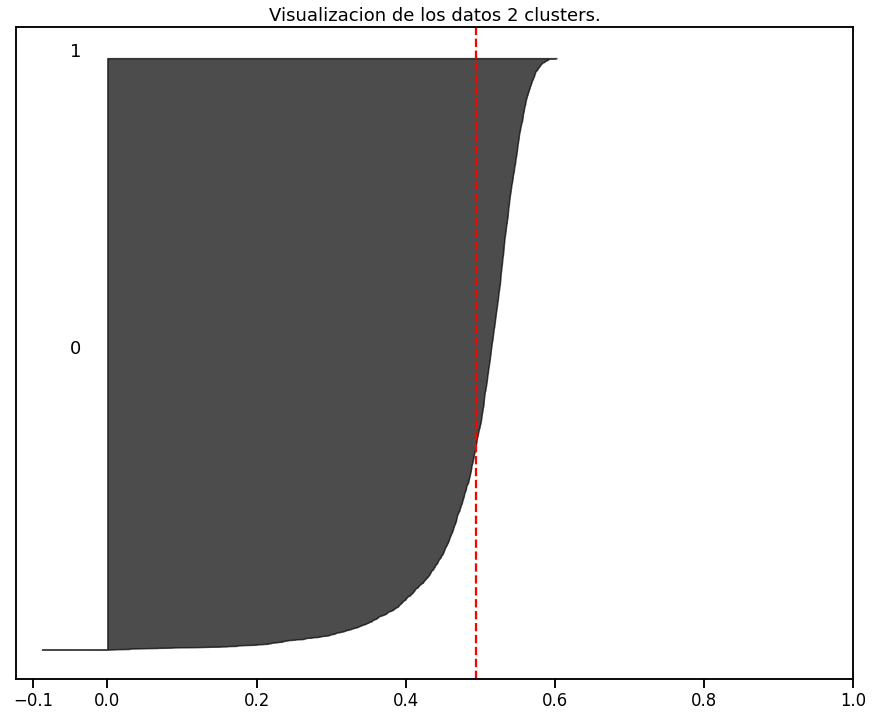

In [ ]:
#Grafico de silueta
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot(1,1,1)

ax1 = silhouette_plt_MeanShift(df_skills2, clusters2, n_clusters_) #Valores negativos son "mal emparejados"

plt.show()

## 3.5 Clustering jerarquico Average Linkage cityblock





In [ ]:

from sklearn.cluster import AgglomerativeClustering

average = AgglomerativeClustering(n_clusters=4, affinity='cityblock', linkage='average')
average.fit(df_skills)
clusters2 = average.labels_



In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86
configure_plotly_browser_state()

a = [21,17]
b = [9,26]

for i in range(2):
  skill_1=skills_ratings[a[i]]
  skill_2=skills_ratings[b[i]]


  average_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                          text=df_n.loc[:,'short_name'],
                            marker=dict(
                                  size=5,
                                  color = clusters2.astype(np.float), #set color equal to a variable
                                  colorscale='Portland',
                                  showscale=False)
                            )

  crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                        text=df_n.loc[bool_crack,'short_name'],
                        textfont=dict(family='sans serif',size=10,color='black'),
                        opacity=0.9,mode='text')

  data=[average_clusters,crack]

  layout = go.Layout(title="Average Linkage",titlefont=dict(size=20),
                  xaxis=dict(title=skill_1),
                  yaxis=dict(title=skill_2),
                  autosize=False, width=1000,height=1000)

  fig = go.Figure(data=data, layout=layout)

  iplot(fig)

**EVALUACION CON SILHOUETTE**


In [ ]:
def silhouette_jerarquico(x):
  range_n_clusters = [2,3, 4, 5, 6, 7]
  index = 0
  fig = plt.figure(figsize=(20, 30))

  for n_clusters in range_n_clusters:
      index += 1
      ax1 = plt.subplot(len(range_n_clusters)/2 + len(range_n_clusters)%2, 2, index)
      ax1.set_xlim([-0.1, 1])
      ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
      clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='cityblock', linkage='average')
      cluster_labels = clusterer.fit_predict(x)
      silhouette_avg = silhouette_score(x, cluster_labels)
      print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)
      sample_silhouette_values = silhouette_samples(x, cluster_labels)
      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                            ith_cluster_silhouette_values, facecolor=color,
                            edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples
      # endfor
      
      ax1.set_title(f"\nVisualizacion de los datos {n_clusters} clusters\n ")
      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  return ax1

Para n_clusters = 2 El silhouette_score promedio es : 0.5729950775552872
Para n_clusters = 3 El silhouette_score promedio es : 0.6166960667794875
Para n_clusters = 4 El silhouette_score promedio es : 0.3367382406862353
Para n_clusters = 5 El silhouette_score promedio es : 0.3310751280612415
Para n_clusters = 6 El silhouette_score promedio es : 0.16589808530499517
Para n_clusters = 7 El silhouette_score promedio es : 0.276769369458102


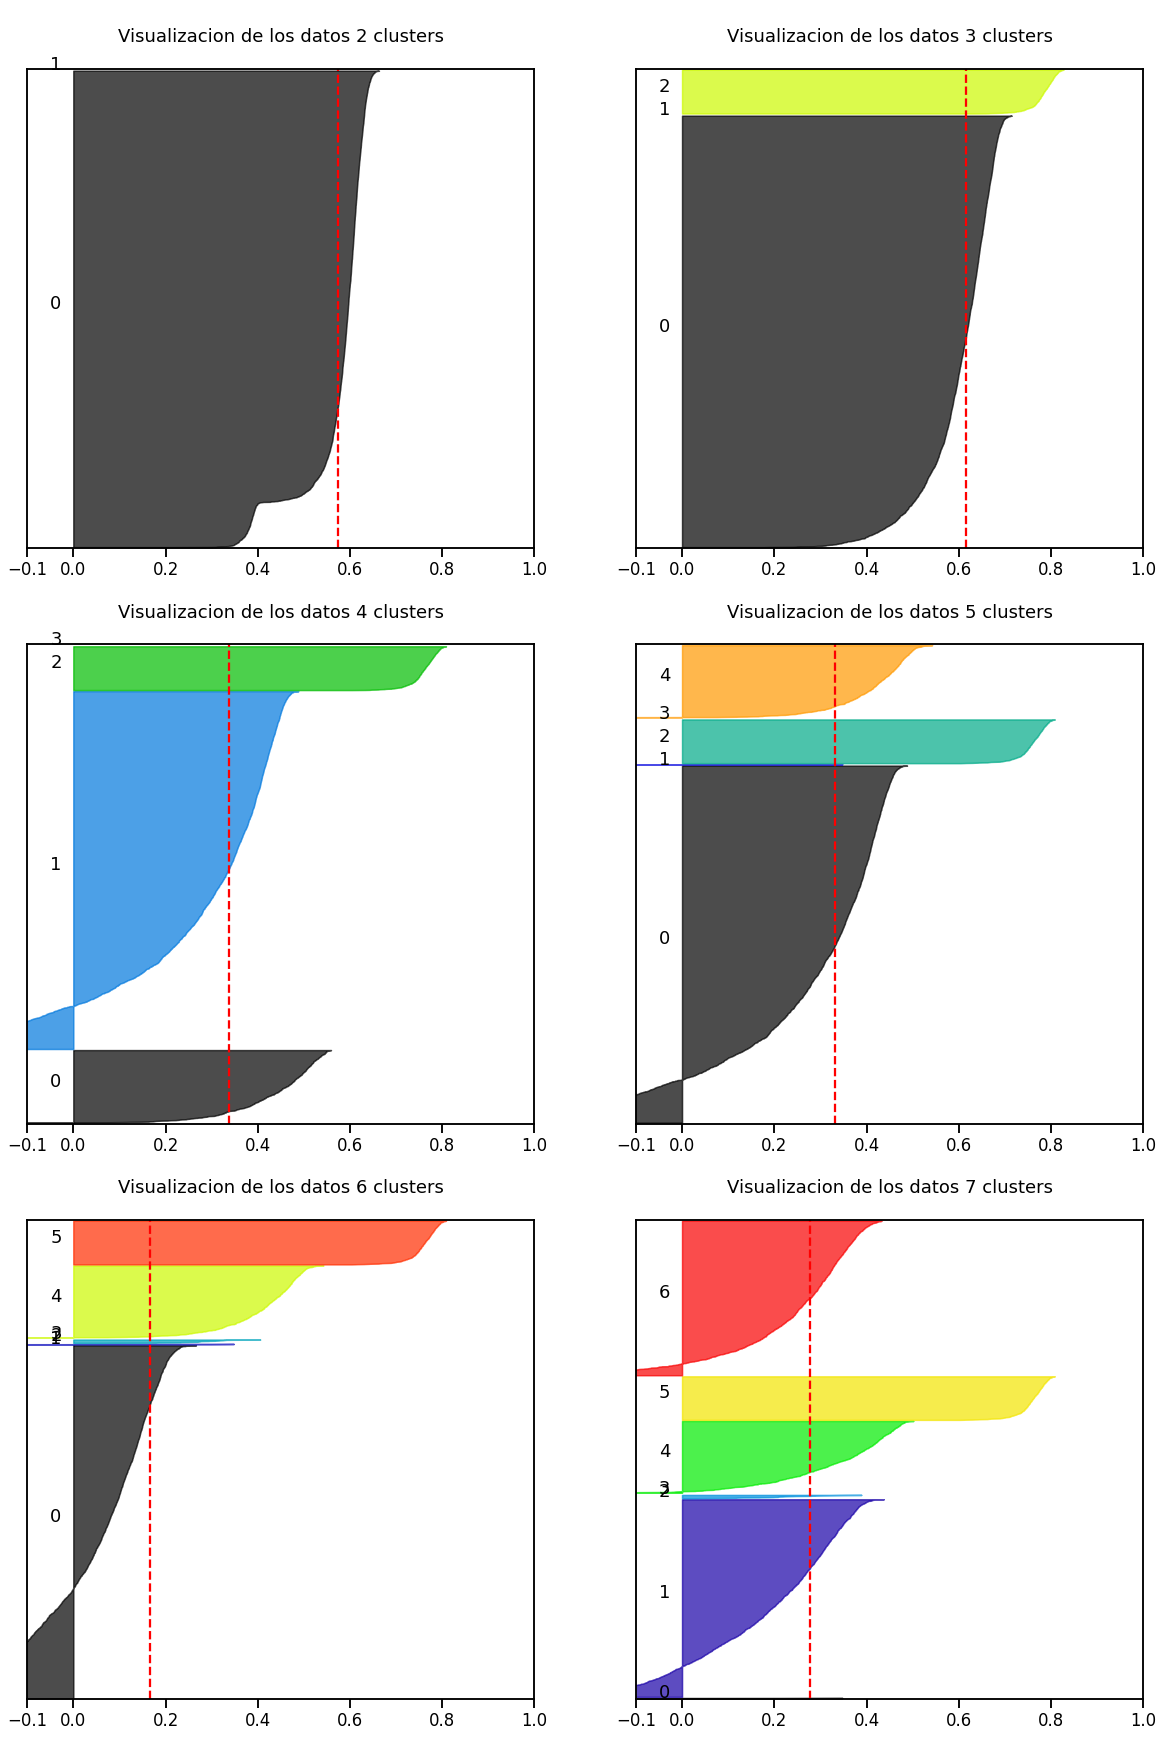

In [ ]:
#Grafico de silueta

ax1 = silhouette_jerarquico(df_skills) 

plt.show()

##3.6 Clustering jerarquico Average Linkage cityblock SIN ARQUEROS

In [82]:
from sklearn.cluster import AgglomerativeClustering

average = AgglomerativeClustering(n_clusters=3, affinity='cityblock', linkage='average')
average.fit(df_skills2)
clusters2 = average.labels_
print(max(clusters2)+1)

3


In [83]:
data=[]
bool_crack=df_n2["overall"] > 85
bool_no_crack=df_n2["overall"]<86
configure_plotly_browser_state()
a = [21,17]
b = [9,26]

for i in range(2):
  skill_1=skills_ratings2[a[i]]
  skill_2=skills_ratings2[b[i]]


  average_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                            mode='markers',
                          text=df_n2.loc[:,'short_name'],
                            marker=dict(
                                  size=5,
                                  color = clusters2.astype(np.float), #set color equal to a variable
                                  colorscale='Portland',
                                  showscale=False)
                            )

  crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Top players',
                        text=df_n2.loc[bool_crack,'short_name'],
                        textfont=dict(family='sans serif',size=10,color='black'),
                        opacity=0.9,mode='text')

  data=[average_clusters,crack]

  layout = go.Layout(title="Average Linkage",titlefont=dict(size=20),
                  xaxis=dict(title=skill_1),
                  yaxis=dict(title=skill_2),
                  autosize=False, width=1000,height=1000)

  fig = go.Figure(data=data, layout=layout)

  iplot(fig)

**EVALUACION CON SILHOUETTE**

Para n_clusters = 2 El silhouette_score promedio es : 0.3127441086160382
Para n_clusters = 3 El silhouette_score promedio es : 0.2343597648905888
Para n_clusters = 4 El silhouette_score promedio es : 0.16678631741470482
Para n_clusters = 5 El silhouette_score promedio es : 0.24933722002274003
Para n_clusters = 6 El silhouette_score promedio es : 0.22236774423642836
Para n_clusters = 7 El silhouette_score promedio es : 0.18137794419045125


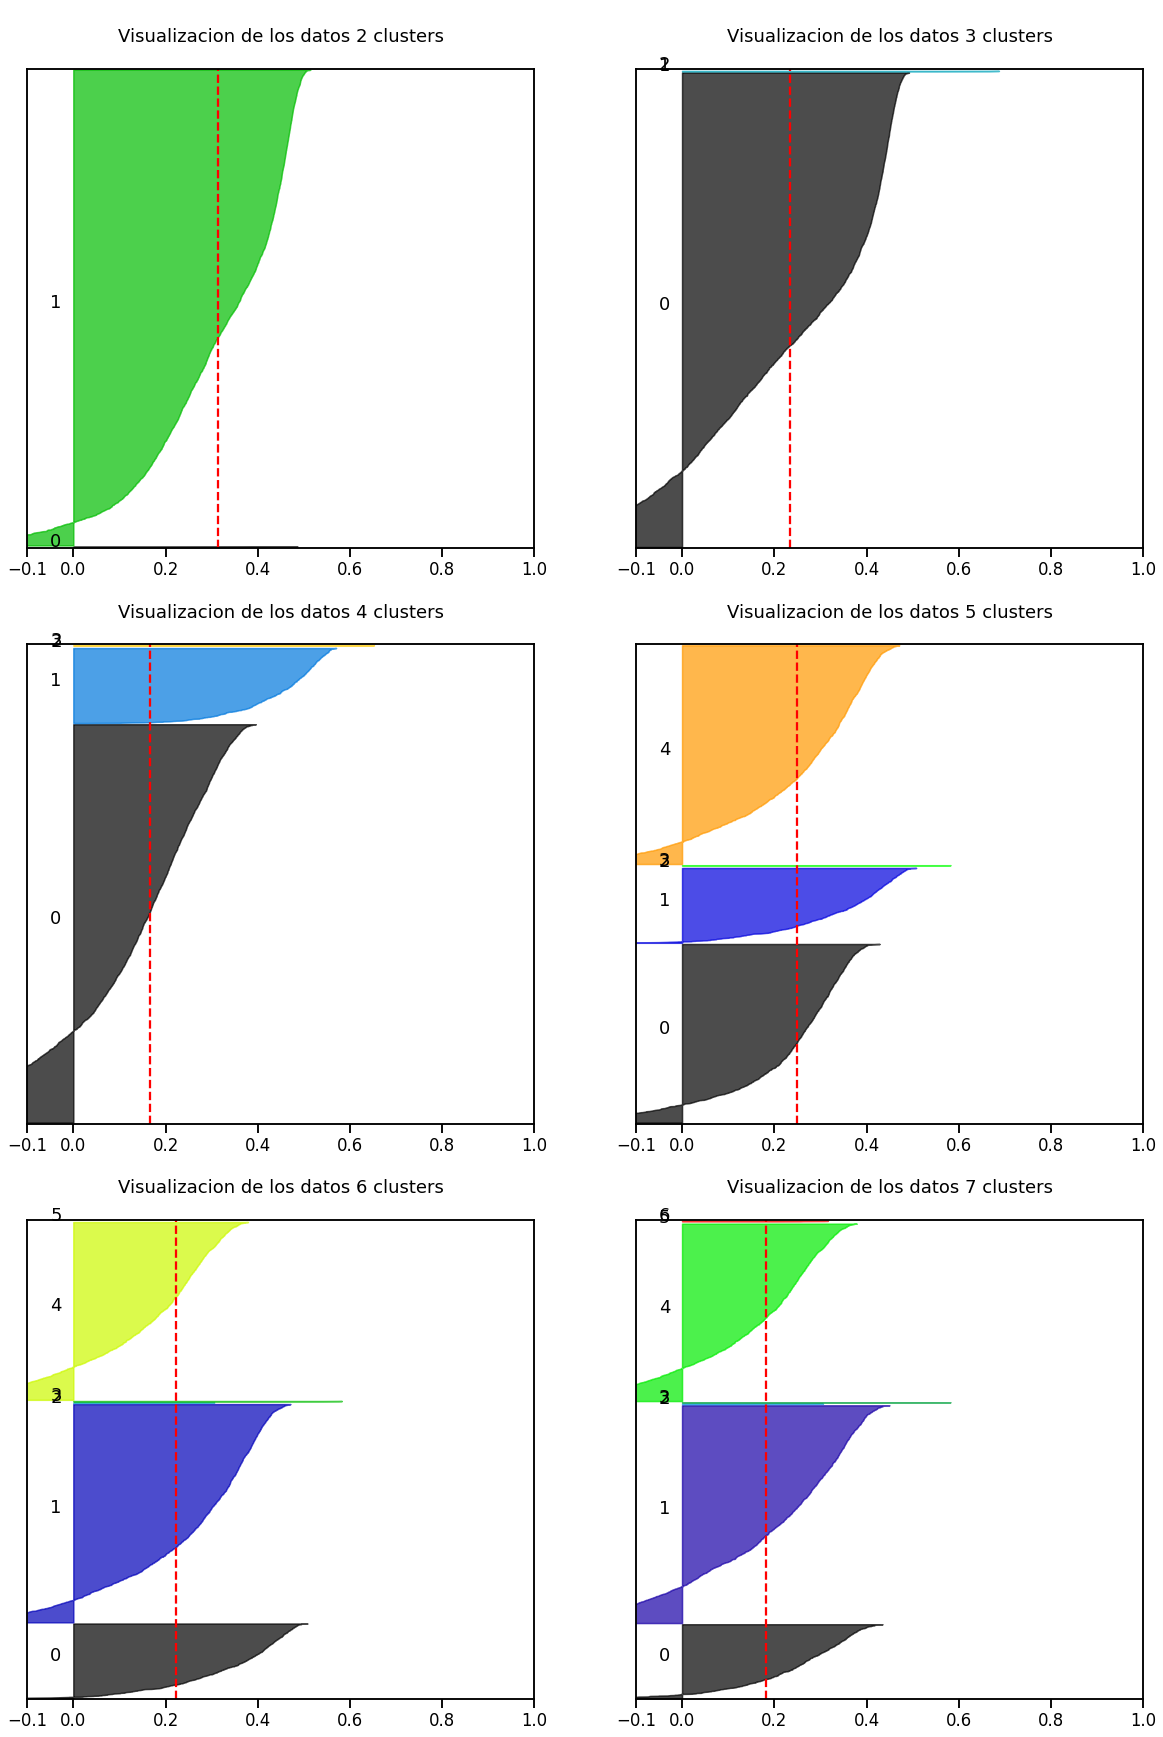

In [64]:
#Grafico de silueta

ax1 = silhouette_jerarquico(df_skills2) 

plt.show()

## 4.0 Análisis de los clusters encontrados.

Se puede observar a partir del analisis anterior que:

**DATOS CON ARQUEROS**




*   Los tres metodos de clustering: K medias, Mean Shift y Jerarquico Average Linkage diferencian bien a los arqueros.
*   Tanto Mean Shift como Average Linkage toman a Machine Gun como un cluster per se. Mean Shift encuentra 3 clusters con los parametros seteados, uno de los cuales es Machine Gun, por lo que en realidad serian dos clusters encontrados en el dataset. En el caso de Average Linkage lo forzamos a encontrar 4 clusters de los cuales encontro 3 para el dataset y 1 para Machine Gun.
* Tanto para K medias como para Average Linkage, nosotros forzamos a los modelos a encontrar 4 clusters (basandonos en el metodo del codo). Sin embargo, la evaluacion de silhouette nos dice que el valor optimo de clusters para K medias es 2 y para Average Linkage es 3.
* Comparando los valores de silhoette de los tres modelos, resulta que K medias es el que mejor funciona.



**DATOS SIN ARQUEROS**

* Tanto Mean shift como Average Linkage encuentran un unico cluster en el dataset sin arqueros. Ambos toman a Machine Gun como un cluster separado.
* Segun el metodo del codo en K medias, forzamos al algoritmo a encontrar 3 clusters. Sin embargo la evaluacion de silhouette indica que el valor optimo son 2 clusters.
* K medias es el unico algoritmo que diferencia mas de 1 cluster en el dataset sin arqueros.


## 5.0 Embeddings y técnicas de clustering.

###5.1 tSNE

In [131]:
n_sne=2000 
df_sne=df.loc[:n_sne]
X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  34


In [132]:
X.head(5)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
3             41              78                12                    34   
4             84              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   
3                       19                     11                65   
4                       41                     87                89   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   
3                   11                   68                 27   
4                   88                   91                 34   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   
3                         12                        18                  87   
4                         27                        22                  11   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0  

In [133]:
from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.008s...
[t-SNE] Computed neighbors for 2001 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 13.432901
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.864685
[t-SNE] KL divergence after 1000 iterations: 1.324055
t-SNE done! Time elapsed: 14.963106393814087 seconds


In [134]:
X_tsne[1990:2000] #diez jugadores

array([[ 15.63267  , -45.481556 ],
       [ 15.265804 ,  25.226095 ],
       [-21.01529  , -60.411816 ],
       [-14.261881 , -51.56511  ],
       [ -5.3909006, -48.92747  ],
       [-25.954782 , -54.824856 ],
       [  0.6130183, -41.813183 ],
       [  1.6634802,  25.108273 ],
       [  3.5069103,  55.38081  ],
       [ 12.097463 ,   4.7363553]], dtype=float32)

In [135]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores
configure_plotly_browser_state()
#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)
#plot(fig)

Podemos ver que en el espacio tsne tambien se diferencian facilmente los arqueros.

Ponemos a prueba la intuición o preconcepto de que los jugadores se agrupan en el espacio de las habilidades (transformado/reducido por tsne) según la posición...

Creamos una nueva columna con 4 categorias de posiciones:

In [136]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [137]:
df_sne["Position2"]=df_sne["player_positions"].apply(lambda x: pos2(x))

df_sne["Position2"].value_counts()

nan           1057
Defender       381
Forward        257
GK             206
Midfielder     100
Name: Position2, dtype: int64

In [138]:
bool_striker= df_sne["Position2"] == 'Forward'
bool_midfielder= df_sne["Position2"] == 'Midfielder'
bool_defender= df_sne["Position2"] == 'Defender'
bool_gk= df_sne["Position2"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]
configure_plotly_browser_state()

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=1150)

fig = go.Figure(data=data, layout=layout)

iplot(fig)
#plot(fig)

Como conclusión, podemos ver que en este espacio 2D es realmente muy evidente la separación de los arqueros del resto de los jugadores (lo cual es lógico pues sus habilidades son muy diferentes, lo vimos también para los diferentes algoritmos de clustering).

El agrupamiento visual, en este espacio, de los jugadores no es tan evidente pues los clusters no son disconexos.

Las posiciones no explican tan claramente los clusters encontrados

Una explicación posible puede ser porque hay jugadores ambivalentes que unen los espacios entre defensa, mediocampo y ataque.

####5.1.1 tSNE con K medias

In [139]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

scores = [KMeans(n_clusters=i+2).fit(X_tsne).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters\n")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters\n')

In [140]:
n_clust = 4
km = KMeans(n_clusters=n_clust)
km.fit(X_tsne)
clusters = km.labels_

In [141]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores
configure_plotly_browser_state()
#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Clustering Kmeans en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Para n_clusters = 2 El silhouette_score promedio es : 0.4970988
Para n_clusters = 3 El silhouette_score promedio es : 0.59389776
Para n_clusters = 4 El silhouette_score promedio es : 0.54750544
Para n_clusters = 5 El silhouette_score promedio es : 0.48591807
Para n_clusters = 6 El silhouette_score promedio es : 0.462567
Para n_clusters = 7 El silhouette_score promedio es : 0.47407272


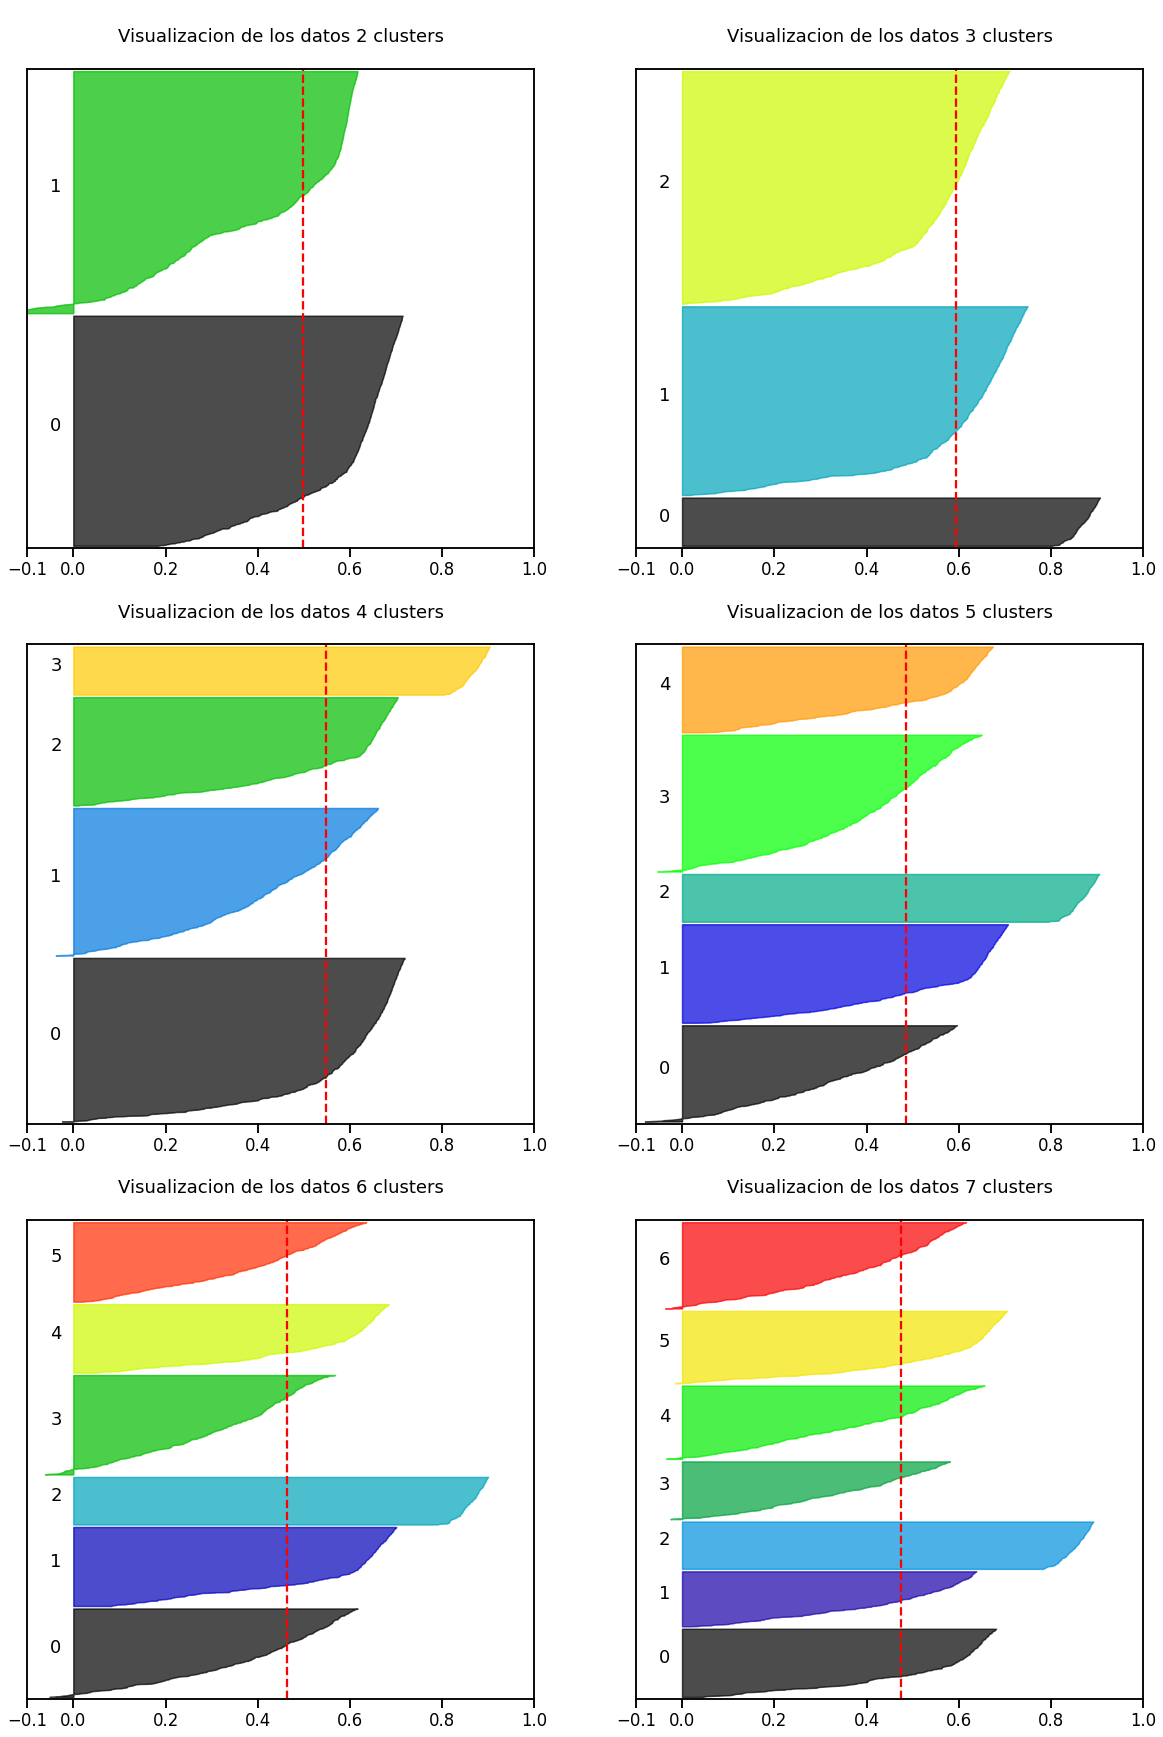

In [142]:
#Grafico de silueta

ax1 = silhouette_plt_kmeans(X_tsne) 

plt.show()

####5.1.2 tSNE con Mean Shift

In [145]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=20, bin_seeding=True)

ms.fit(X_tsne)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)


Numero estimado de clusters para Mean Shift : 4


In [144]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores
configure_plotly_browser_state()
#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Clustering Mean Shift en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [148]:
#Grafico de silueta
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot(1,1,1)

ax1 = silhouette_plt_MeanShift(X_tsne, clusters2, n_clusters_) 

plt.show()

Para Mean Shift n_clusters = 4 
 El silhouette_score promedio es : 0.5511191487312317


####5.1.3 Conclusiones Tsne

Tanto K medias como Mean Shift diferencian los clusters 4 clusters de 'Forward', 'Midfielder', 'Defender' y 'GK'. La distribucion de los clusters visualmente se asemeja a la distribucion obtenida en el grafico de categorias. 

###5.2 Componentes Principales

In [109]:
#Retiramos arqueros y jugadores con bajo ranking
n_acp=18000

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["player_positions"]!='GK')&(df['overall']>70)]

X=df_acp[skills_ratings2] # Datos para proyectar
print('los datos tienen dimesión n= ',len(skills_ratings2))

los datos tienen dimesión n=  29


La descomposición PCA del sklearn centra los datos pero no los normaliza (input data is centered but not scaled for each feature before applying the SVD) por eso estandarizamos primero.

In [110]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna
print(X_scaled[0:2])
X.head(2)

[[ 1.85191727  2.22591719  0.50579762  3.10516247  2.04822158  2.51241012
   2.10810769  2.43109902  2.66408211  3.18353021  1.64821701  1.12843689
   1.84130682  4.14284295  2.07189558  1.52906387 -0.08406758  0.22655488
  -0.19387423  2.1898988  -1.4663244  -0.88327707  2.03265645  2.40441334
   1.23931568  3.66320434 -1.29845475 -1.00858184 -1.34122585]
 [ 1.55947807  2.16540639  2.10231142  1.74199744  1.98481151  1.7868031
   1.30894567  1.31434768  1.17375414  2.6471945   1.4928247   1.69221681
   1.36330133  4.32209798  0.25161067  2.3556585   2.17528741  1.22615709
   0.66487084  2.12277809 -0.34105661 -1.43450959  2.09945366  1.42414494
   2.0028642   3.51747437 -1.56314263 -1.24990788 -1.43455936]]


attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   

   defending_standing_tackle  defending_sliding_tackle  
0                         37                        26  
1                         32                        24

In [111]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.41539732 0.1628158  0.10483924 0.06417477]
proporción de varianza por componente acumulada:  [0.41539732 0.57821312 0.68305237 0.74722714]
tamaño de los datos:  (4316, 4)


In [112]:
print (X_projected[0:5])#5 primeros jugadores, n_components

[[-9.58406498 -3.37115926  1.94860932 -1.15377996]
 [-7.71157229 -1.80571657  3.76234342 -4.41297876]
 [-9.25377459 -2.08060644  0.83786438 -0.92179286]
 [-8.61933843 -2.1726826   0.71755664 -1.07734502]
 [-6.73755421 -5.36960635  2.22023637 -0.77128081]]


In [113]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-0.2002416  -0.24457002  0.1387372  -0.15227045 -0.23419479 -0.25726306
  -0.2354224  -0.20427272 -0.06898224 -0.24115012 -0.17874764 -0.14786427
  -0.21836009 -0.09080759 -0.19032464 -0.19190392  0.0700259  -0.05139154
   0.16068918 -0.23881338  0.13940597  0.1636408  -0.25130915 -0.23182765
  -0.1991989  -0.11103116  0.16854832  0.17140296  0.1745333 ]
 [-0.17595824  0.09640341  0.00515678 -0.31667308  0.0379716  -0.065091
  -0.11085811 -0.11085231 -0.36142859 -0.14406629  0.06032944  0.07984149
   0.00247144 -0.22056692 -0.05255303 -0.03984073 -0.00957941 -0.18322191
  -0.00956936 -0.05181724 -0.22686967 -0.34793204  0.01928747 -0.16417896
   0.03874948 -0.21053532 -0.32585064 -0.34199031 -0.33093901]
 [-0.13403308  0.17563473  0.33581861  0.04005796  0.20679871 -0.05516959
   0.01917193  0.08605977 -0.02144661  0.03631379 -0.32948712 -0.29770198
  -0.28296551  0.17525074 -0.30107484  0.24880508  0.04204244 -0.14552539
   0.32637737  0.15550762  0.13892173 -0.0656721   0.1026848  

In [114]:
#Graph 1
data=[]
configure_plotly_browser_state()
for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [115]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings2:
    MachineGunDict[skills]=99
    
#Lo agregamos a la base:
df_acp=df_acp.append(MachineGunDict,ignore_index=True)
X=df_acp[skills_ratings2] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar con el dato agregado 
#pero con la normalización de la base sin el dato nuevo
X_projected=pca.transform(X_scaled) # volvemos a proyectar pero con el dato nuevo

In [116]:
#Graph 2
#Choose your player
recherche_joueur=df_acp["short_name"]=='L. Messi'
configure_plotly_browser_state()
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86
bool_machinegun=df_acp["short_name"]=='MachineGun'

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Crack',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

acp_no_crack =go.Scatter(x=X_projected[bool_no_crack,0], y=X_projected[bool_no_crack,1],name='Average player',
                         text=df_acp.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

acp_machinegun =go.Scatter(x=X_projected[bool_machinegun,0], y=X_projected[bool_machinegun,1],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=X_projected[recherche_joueur,0], y=X_projected[recherche_joueur,1],name='Searched player',
                           text=df_acp.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[acp_no_crack,acp_crack,acp_machinegun,joueur_recherche]

layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [117]:
#Se puede comparar dos equipos y ver los perfiles de los jugadores en las dos primeras componentes.
teamA='Liverpool'
teamB='Manchester United'
configure_plotly_browser_state()
bool_teamA=df_acp["club"]==teamA
bool_teamB=df_acp["club"]==teamB

palette=['navy','red','#A2D5F2','orange','green','pink','grey']  
data=[]

acp_teamA =go.Scatter(x=X_projected[bool_teamA,0], y=X_projected[bool_teamA,1],name=teamA,
                      text=df_acp.loc[bool_teamA,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[1],size=10),mode='markers+text')

acp_teamB =go.Scatter(x=X_projected[bool_teamB,0], y=X_projected[bool_teamB,1],name=teamB,
                      text=df_acp.loc[bool_teamB,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[4],size=10),mode='markers+text')

acp_all =go.Scatter(x=X_projected[:,0], y=X_projected[:,1],name='All',
                         text=df_acp.loc[:,'short_name'],
                         opacity=0.3,marker=dict(color=palette[6],size=3),mode='markers')


data=[acp_teamA,acp_teamB,acp_all]

layout = go.Layout(title="ACP - {} vs {}".format(teamA,teamB),titlefont=dict(size=20),
                xaxis=dict(title='F1'),
                yaxis=dict(title='F2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

####5.2.1 Clustering

Veamos ahora que agrupamientos podemos hacer de los jugadores usando las dos/tres o cuatro primeras componentes.

In [118]:
##Hay que quitar MachineGun para Clustering
n_acp=18000

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["player_positions"]!='GK')&(df['overall']>70)]

X=df_acp[skills_ratings2] # Datos para proyectar
X_scaled=std_scale.transform(X) # volvemos a normalizar (ya estaba ajustada)
X_projected=pca.transform(X_scaled) #volvemos a proyectar 
print('dimensiones de la base proyectada:', X_projected.shape)

dimensiones de la base proyectada: (4316, 4)


**K Means** 

In [119]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

scores = [KMeans(n_clusters=i+2).fit(X_projected).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters\n")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters\n')

In [125]:
n_clust = 3
km = KMeans(n_clusters=n_clust)
km.fit(X_projected)
clusters = km.labels_

In [126]:
data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86
configure_plotly_browser_state()
kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Top players',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,acp_crack]

layout = go.Layout(title="ACP + Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Para n_clusters = 2 El silhouette_score promedio es : 0.3650200124069348
Para n_clusters = 3 El silhouette_score promedio es : 0.3184602199300761
Para n_clusters = 4 El silhouette_score promedio es : 0.31404343653701405
Para n_clusters = 5 El silhouette_score promedio es : 0.2859803350013025
Para n_clusters = 6 El silhouette_score promedio es : 0.27319730745005677
Para n_clusters = 7 El silhouette_score promedio es : 0.2516786891313936


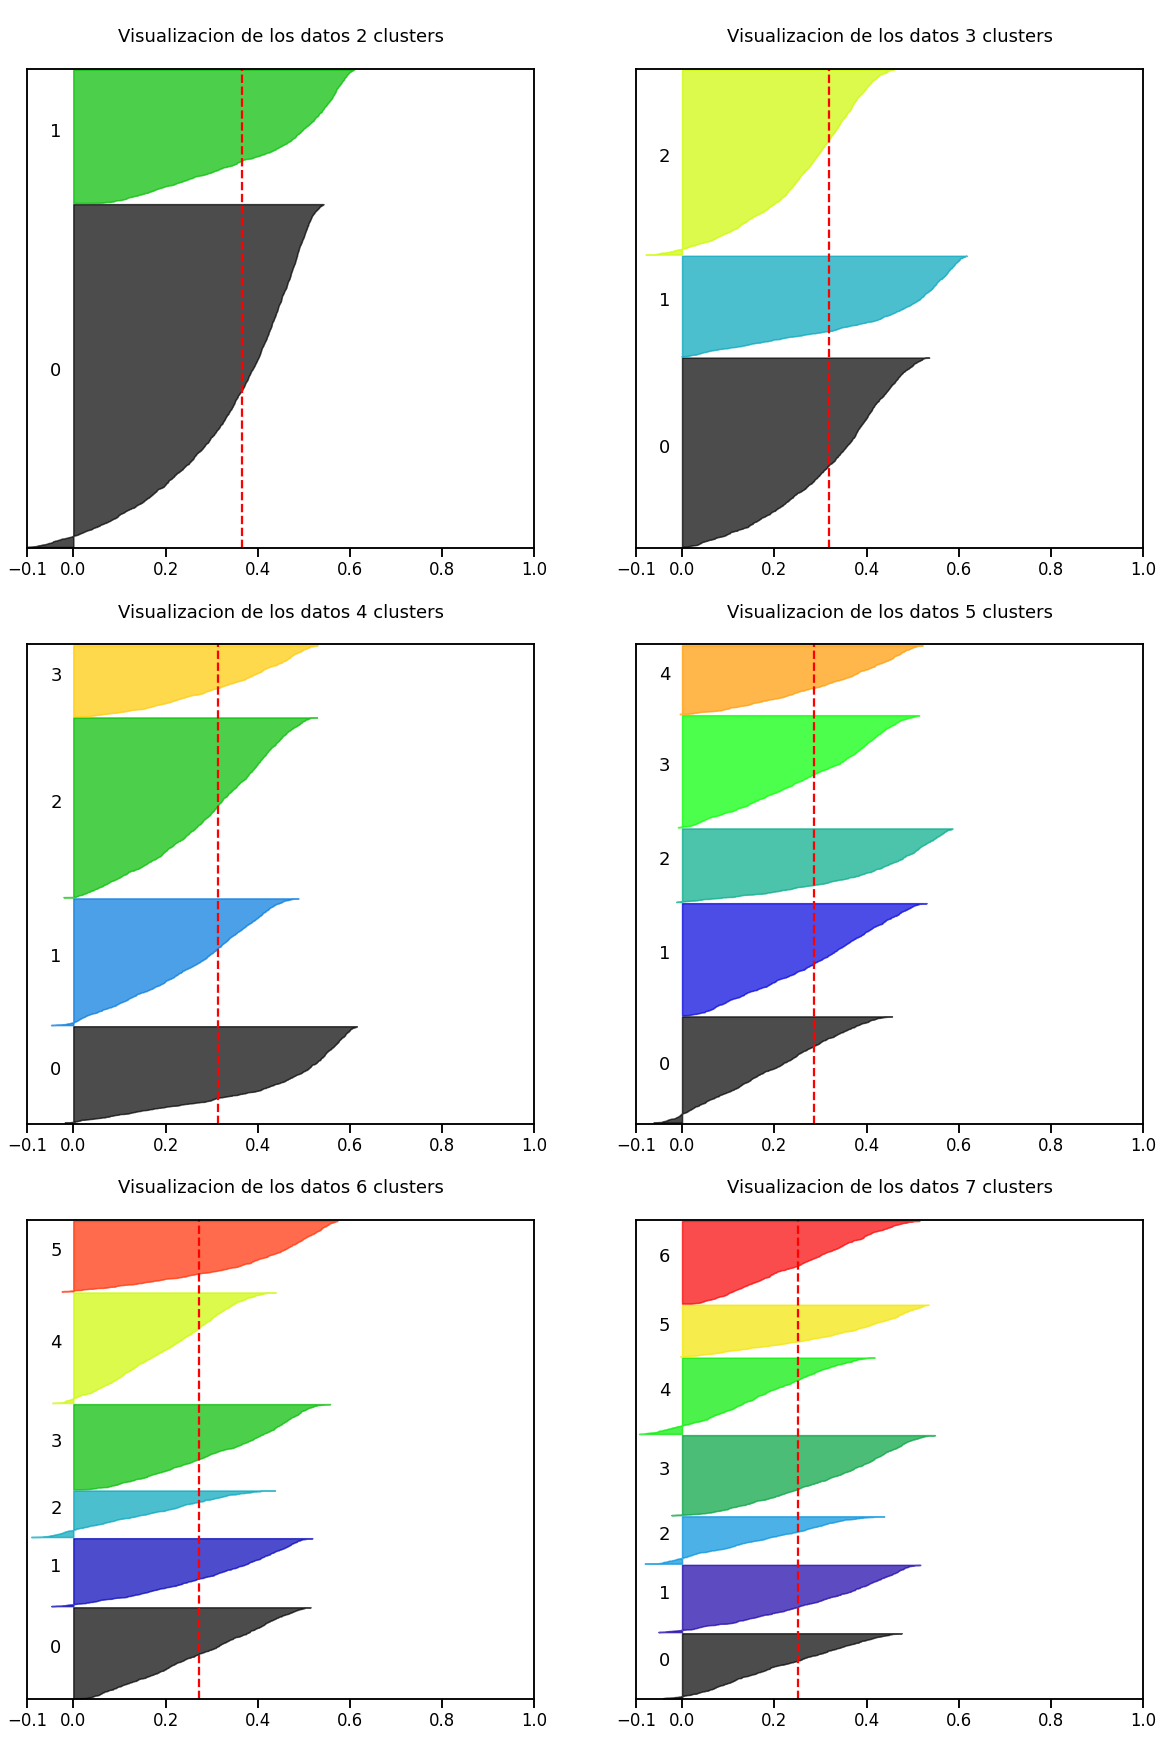

In [122]:
#Grafico de silueta

ax1 = silhouette_plt_kmeans(X_projected) 

plt.show()

**Mean Shift** 





In [127]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.cluster import estimate_bandwidth


ms = MeanShift(bandwidth= 3, bin_seeding=True)

ms.fit(X_projected)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 2


In [128]:
data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86
configure_plotly_browser_state()

kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Top players',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,acp_crack]

layout = go.Layout(title="ACP + Clustering Mean Shift ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

MeanShift encontro dos clusters para el espacio con las dos componentes principares.
Seteamos a K medias segun el metodo del codo para encontrar 3 clusters. Sin embargo, la evaluacion de silhouette indica 2 clusters optimos.